# Tutorial on the "Model Plot"

The `hddm.plotting._plot_func_model` model, which we can supply to `hddm.plotting.plot_from_data` or `hddm.plotting.plot_posteriors` functions has become quite versatile (complex).

This tutorial is meant to illustrate some of it's capabilities. 
We can generate didactically useful plots of a variety of generative models.
The **LAN Tutorial** also shows some of the usecases.


## Install (colab)

In [1]:
# package to help train networks
# !pip install git+https://github.com/AlexanderFengler/LANfactory

# package containing simulators for ssms
# !pip install git+https://github.com/AlexanderFengler/ssm_simulators

# packages related to hddm
# !pip install cython
# !pip install pymc==2.3.8
# !pip install git+https://github.com/hddm-devs/kabuki
# !pip install git+https://github.com/hddm-devs/hddm

## Import modules

In [1]:
# MODULE IMPORTS ----

# warning settings
import warnings

warnings.simplefilter(action="ignore", category=FutureWarning)

# Data management
import pandas as pd
import numpy as np
import pickle

# Plotting
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

# Stats functionality
from statsmodels.distributions.empirical_distribution import ECDF

# HDDM
import hddm
from hddm.simulators.hddm_dataset_generators import simulator_h_c

**Note** a slight difference in how we treat generative models. 
Thanks to the LAN-extension, we have many generative models available to us, which we can broadbly classify as:

1. Legacy models, now titled: `ddm_hddm_base` and `full_ddm_hddm_base`. The `full_ddm_hddm_base` model is used when any of the `sv`, `st` or `sz` parameters are positive.
2. 2-choice models enabled by the LAN-extension: amongst others the `levy`, `weibull` and `angle` models.
3. n-choice models enables by the LAN-extension: amongst others the `race_3` and `race_4` models.

The **model plots** work best with the 2-choice models enabled by the LAN-extension. 
A n-choice version for the **model plots** exists (see the `_plot_func_model_n` function) but is less well tested.
**Model plots** also work for the `hddm_base` models, however the positioning of the *reaction time and choice* histograms is a little more tricky, and will sometimes lead to unsatisfactory results.


## Example 1: Simple Data from `ddm_hddm_base` model


In [2]:
from hddm.simulators.hddm_dataset_generators import simulator_h_c

model = "ddm_hddm_base"
n_samples = 1000

data, full_parameter_dict = simulator_h_c(
    n_subjects=1,
    n_trials_per_subject=n_samples,
    model=model,
    p_outlier=0.00,
    conditions=None,
    depends_on=None,
    regression_models=None,
    regression_covariates=None,
    group_only_regressors=False,
    group_only=None,
    fixed_at_default=None,
)

In [4]:
data

,rt,response,subj_idx,v,a,z,t
0,3.279359,1.0,0,1.241863,2.258145,0.605863,2.262367
1,2.632366,1.0,0,1.241863,2.258145,0.605863,2.262367
2,3.041361,1.0,0,1.241863,2.258145,0.605863,2.262367
3,2.648366,1.0,0,1.241863,2.258145,0.605863,2.262367
4,2.437368,1.0,0,1.241863,2.258145,0.605863,2.262367
...,...,...,...,...,...,...,...
995,2.478368,1.0,0,1.241863,2.258145,0.605863,2.262367
996,2.711365,1.0,0,1.241863,2.258145,0.605863,2.262367
997,3.343362,1.0,0,1.241863,2.258145,0.605863,2.262367
998,2.670366,1.0,0,1.241863,2.258145,0.605863,2.262367


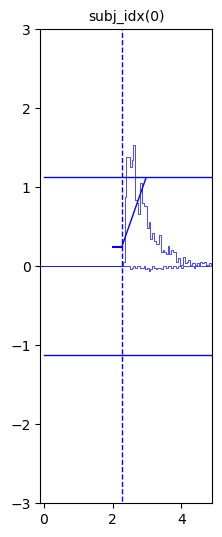

In [5]:
hddm.plotting.plot_from_data(
    df=data,
    generative_model=model,
    save=False,
    make_transparent=False,
    path="tmp_figures",
    value_range=np.arange(-0.1, 5, 0.1),
    plot_func=hddm.plotting._plot_func_model,
    keep_frame=True,
    **{"hist_bottom": 0.0}
)
plt.show()

## Example 2: Simple Data from a model enabled by LAN-extension


In [6]:
from hddm.simulators.hddm_dataset_generators import simulator_h_c

model = "angle"
n_samples = 1000

data, full_parameter_dict = simulator_h_c(
    n_subjects=1,
    n_trials_per_subject=n_samples,
    model=model,
    p_outlier=0.00,
    conditions=None,
    depends_on=None,
    regression_models=None,
    regression_covariates=None,
    group_only_regressors=False,
    group_only=None,
    fixed_at_default=None,
)

In [7]:
data

,rt,response,subj_idx,v,a,z,t,theta
0,1.117624,1.0,0,0.832015,1.953756,0.426032,0.685626,0.745569
1,2.047633,0.0,0,0.832015,1.953756,0.426032,0.685626,0.745569
2,1.491619,1.0,0,0.832015,1.953756,0.426032,0.685626,0.745569
3,1.583618,1.0,0,0.832015,1.953756,0.426032,0.685626,0.745569
4,1.662617,1.0,0,0.832015,1.953756,0.426032,0.685626,0.745569
...,...,...,...,...,...,...,...,...
995,1.283622,0.0,0,0.832015,1.953756,0.426032,0.685626,0.745569
996,2.259643,1.0,0,0.832015,1.953756,0.426032,0.685626,0.745569
997,1.866625,0.0,0,0.832015,1.953756,0.426032,0.685626,0.745569
998,1.129624,1.0,0,0.832015,1.953756,0.426032,0.685626,0.745569


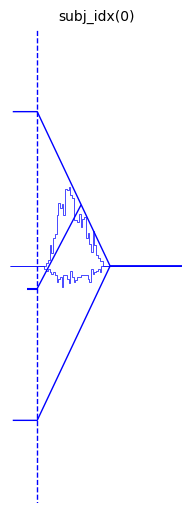

In [8]:
hddm.plotting.plot_from_data(
    df=data,
    generative_model=model,
    save=False,
    make_transparent=False,
    path="tmp_figures",
    value_range=np.arange(-0.1, 5, 0.1),
    plot_func=hddm.plotting._plot_func_model,
    keep_frame=False,
    **{"hist_bottom": 0}
)
plt.show()

We can move around the histograms with the `hist_bottom`, argument (`kwarg`). 

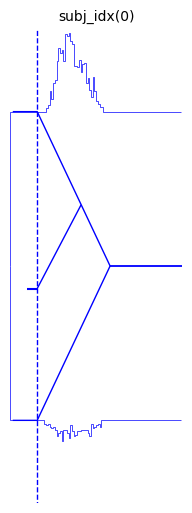

In [9]:
hddm.plotting.plot_from_data(
    df=data,
    generative_model=model,
    save=False,
    make_transparent=False,
    path="tmp_figures",
    value_range=np.arange(-0.1, 5, 0.1),
    plot_func=hddm.plotting._plot_func_model,
    keep_frame=False,
    **{"hist_bottom": data.a.values[0], "ylim": 3}
)
plt.show()

We can look at a few other arguments to illustrate the range of styling options.

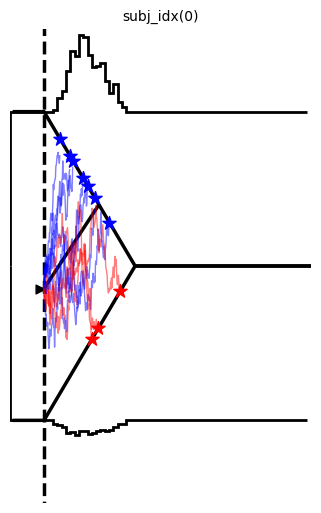

In [10]:
hddm.plotting.plot_from_data(
    df=data,
    generative_model=model,
    save=False,
    make_transparent=False,
    path="tmp_figures",
    value_range=np.arange(-0.1, 7, 0.1),
    plot_func=hddm.plotting._plot_func_model,
    keep_frame=False,
    figsize=(14, 6),
    **{
        "hist_bottom": data.a.values[0],
        "ylim": 3,
        "add_trajectories": True,
        "n_trajectories": 10,
        "markersize_trajectory_rt_choice": 100,
        "markertype_trajectory_rt_choice": "*",
        "color_trajectories": {-1.0: "red", 1.0: "blue"},
        "markercolor_trajectory_rt_choice": {-1.0: "red", 1.0: "blue"},
        "add_data_model_markersize_starting_point": 40,
        "add_data_model_markertype_starting_point": ">",
        "add_data_model_markershift_starting_point": -0.1,
        "linewidth_histogram": 2,
        "linewidth_model": 2,
        "bin_size": 0.1,
        "data_color": "black",
    }
)
plt.show()

## Example 3: More complex data


In [11]:
model = "angle"
n_samples = 500

data, full_parameter_dict = simulator_h_c(
    n_subjects=9,
    n_trials_per_subject=n_samples,
    model=model,
    p_outlier=0.00,
    conditions=None,
    depends_on=None,
    regression_models=None,
    regression_covariates=None,
    group_only_regressors=False,
    group_only=None,
    fixed_at_default=None,
)

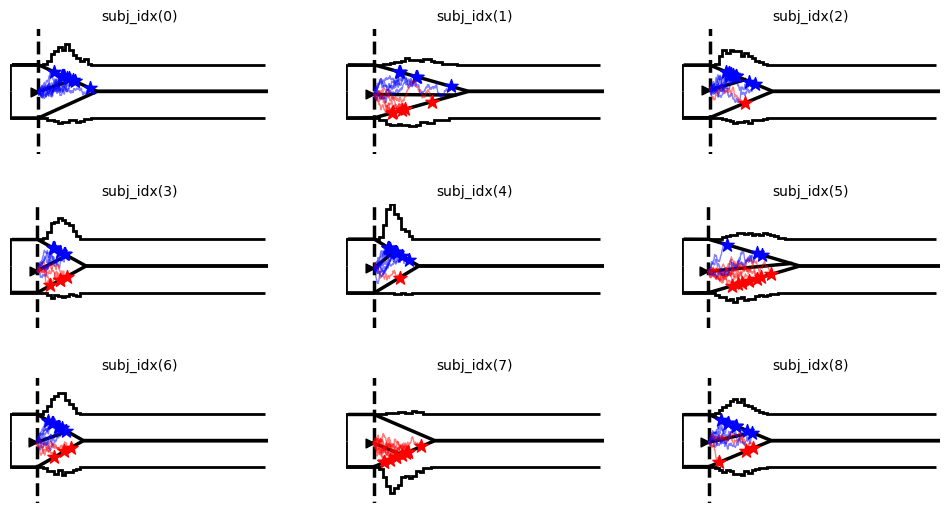

In [12]:
hddm.plotting.plot_from_data(
    df=data,
    generative_model=model,
    save=False,
    columns=3,
    make_transparent=False,
    path="tmp_figures",
    value_range=np.arange(-0.1, 7, 0.1),
    plot_func=hddm.plotting._plot_func_model,
    keep_frame=False,
    figsize=(12, 6),
    **{
        "hist_bottom": data.a.values[0],
        "ylim": 4,
        "add_trajectories": True,
        "n_trajectories": 10,
        "markersize_trajectory_rt_choice": 100,
        "markertype_trajectory_rt_choice": "*",
        "color_trajectories": {-1.0: "red", 1.0: "blue"},
        "markercolor_trajectory_rt_choice": {-1.0: "red", 1.0: "blue"},
        "add_data_model_markersize_starting_point": 40,
        "add_data_model_markertype_starting_point": ">",
        "add_data_model_markershift_starting_point": -0.1,
        "linewidth_histogram": 2,
        "linewidth_model": 2,
        "bin_size": 0.1,
        "data_color": "black",
    }
)
plt.show()

## Example 4: Making gifs

Using the model plot, we can create fairly exciting gifs to illustrate the workings of various Sequential Sampling Models.

In [13]:
import os
import imageio  # package for gifs
from hddm.simulators.basic_simulator import simulator
from hddm.simulators import hddm_preprocess


#
theta = np.array([[0.1, 0.6, 0.5, 0.5]])
theta_secondary = np.array([-0.3, 1.0, 0.5, 1.0])
model = "ddm"
model_secondary = "ddm"
n_samples = 20000
n_samples_secondary = 500  # If we want to have another reference dataset (can be useful for illustrating e.g. likelihood)

create_frames = True
make_gif = True
add_secondary_data = False

# Create trajectories (have to presimulate, then use for frame generation)
n_trajectories = 1
trajectories = []
trajectory_choices = []
for i in range(n_trajectories):
    out_tmp = hddm.simulators.basic_simulator.simulator(
        theta=theta, model=model, n_samples=1, delta_t=0.001
    )
    trajectories.append(out_tmp[2]["trajectory"].T)
    trajectory_choices.append(out_tmp[1].flatten())

trajectories_to_supply = np.concatenate(trajectories)
trajectory_choices_to_supply = np.concatenate(trajectory_choices)

trajectory_supply_dict = {
    "trajectories": trajectories_to_supply,
    "trajectory_choices": trajectory_choices_to_supply,
}

# Create data
out = simulator(theta=theta, model=model, n_samples=n_samples, delta_t=0.001)

data = hddm_preprocess(out, subj_id="0", add_model_parameters=True)

out_secondary = simulator(
    theta=theta_secondary,
    model=model_secondary,
    n_samples=n_samples_secondary,
    delta_t=0.001,
)

data_secondary = hddm_preprocess(out_secondary, subj_id="0", add_model_parameters=True)


if create_frames:
    frames = []
    cnt = 0
    for i in range(n_trajectories):
        # Subset precomputed trajectories for current plot
        tmp_trajectories = {}
        tmp_trajectories["trajectories"] = trajectory_supply_dict["trajectories"][
            : (i + 1), :
        ]
        tmp_trajectories["trajectory_choices"] = trajectory_supply_dict[
            "trajectory_choices"
        ][: (i + 1)]
        tmp_maxid = np.argmax(np.where(tmp_trajectories["trajectories"][i, :] > -999))

        for j in range(10, tmp_maxid + 110, 10):
            # Define all the plot options via a kwarg dict
            plot_options_dict = {
                "alpha": 1.0,
                "ylim": 3.0,
                "hist_bottom": data.a.values[0],
                "add_data_rts": True,
                "add_data_model": True,
                "add_trajectories": True,
                "alpha_trajectories": 0.1,
                "n_trajectories": None,
                "supplied_trajectory": tmp_trajectories,  # out[2]['trajectory'][:, 0][np.arange(0, out[2]['trajectory'][:, 0].shape[0], 10)],
                "maxid_supplied_trajectory": j,
                "color_trajectories": {-1.0: "red", 1.0: "blue"},
                "data_color": "black",
                "bin_size": 0.1,
                "linewidth_histogram": 2,
                "linewidth_model": 2,
                "markersize_trajectory_rt_choice": 100,
                "markertype_trajectory_rt_choice": "*",
                "markercolor_trajectory_rt_choice": {-1.0: "red", 1.0: "blue"},
                "highlight_trajectory_rt_choice": True,
                "add_data_model_keep_boundary": True,
                "add_data_model_keep_slope": True,
                "add_data_model_keep_ndt": True,
                "add_data_model_keep_starting_point": True,
                "add_data_model_markersize_starting_point": 40,
                "add_data_model_markertype_starting_point": ">",
                "add_data_model_markershift_starting_point": -0.05,
                "secondary_data": None,  # data_secondary,
                "secondary_data_color": "blue",
                "secondary_data_label": None,
            }

            # Create plot
            hddm.plotting.plot_from_data(
                df=data,
                generative_model=model,
                save=True,
                make_transparent=False,
                path="tmp_figures",
                save_name="myfig_" + str(cnt),
                columns=1,
                groupby=["subj_idx"],
                figsize=(6, 4),
                value_range=np.arange(-0.2, 5, 0.1),
                delta_t_model=0.001,
                keep_frame=False,
                keep_title=False,
                plot_func=hddm.plotting._plot_func_model,
                **plot_options_dict
            )

            plt.close("all")

            # Read image, append to frames and delete it from disk
            image = imageio.v2.imread("./tmp_figures/myfig_" + str(cnt) + ".png")
            frames.append(image)
            os.remove("./tmp_figures/myfig_" + str(cnt) + ".png")

            cnt += 1
    # Append a few frames with the last image to make the gif a bit better to view
    for j in range(100):
        frames.append(image)

imageio.mimsave("./tmp_gifs/example.gif", frames, fps=50)

![SegmentLocal](./tmp_gifs/example_model_plot_tutorial.gif)

### END